# Analysis of variance (ANOVA)

## Libraries and settings

In [44]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print('Current working directory:', os.getcwd())

Current working directory: /workspaces/data_analytics/Week_06


## Read example data (used car data)

In [45]:
# Read data
df = pd.read_excel('t-tests_and_ANOVA.xlsx', sheet_name='anova_data')

# Show categories of 'Make'
print(df['Make'].value_counts())

# Show header
df.head()

Make
VW      20
BMW     20
Fiat    20
Name: count, dtype: int64


,Make,Price
0,VW,29000
1,VW,38000
2,VW,33000
3,VW,64000
4,VW,52000


## Create pivot table of mean price per make

In [46]:
# Create pivot table
table = pd.pivot_table(df, 
                       values='Price',
                       columns=['Make'], 
                       aggfunc=np.mean)
print(table)

Make       BMW     Fiat       VW
Price  54000.0  34000.0  41950.0


## Create grouped boxplot (groups = make, values = prices)

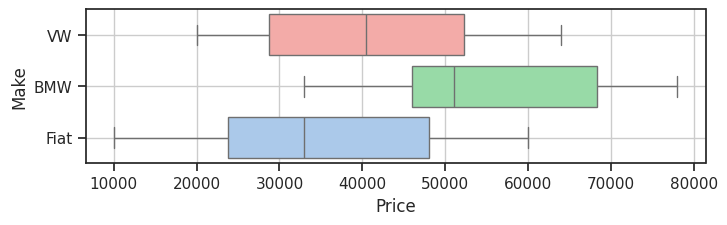

In [47]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Price",
                 y="Make",
                 palette=['r', 'g', 'b'],
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## Analysis of variance (ANOVA)

In [48]:
# Create subsets (groups)
vw = df.loc[df['Make'] == 'VW']
bmw = df.loc[df['Make'] == 'BMW']
fiat = df.loc[df['Make'] == 'Fiat']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(vw['Price'],
                                fiat['Price'], 
                                bmw['Price'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 9.791 p-value 0.0002


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the used car prices of VW, BMW and Fiat differ. Note that, from the ANOVA, it is not clear which groups show differences of prices. For this a post-hoc test could be used (not part of the exercises).</p>

## Importing apartment data

In [49]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_enriched_cleaned.csv', 
                 sep=';', 
                 encoding='utf-8')[['web-scraper-order',
                                    'address_raw',
                                    'lat',
                                    'lon',
                                    'bfs_number',
                                    'bfs_name',
                                    'rooms', 
                                    'area', 
                                    'luxurious', 
                                    'price', 
                                    'price_per_m2',
                                    'pop_dens',
                                    'frg_pct',
                                    'mean_taxable_income',
                                    'dist_supermarket']]

dfdens = df
# Subset: Low population density (pop_dens <= 600)
low_pop_dens = dfdens[dfdens['pop_dens'] <= 600]

# Subset: Moderate population density (600 < pop_dens <= 1500)
moderate_pop_dens = dfdens[(dfdens['pop_dens'] > 600) & (dfdens['pop_dens'] <= 1500)]

# Subset: High population density (pop_dens > 1500)
high_pop_dens = dfdens[dfdens['pop_dens'] > 1500]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(774, 15)


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create pivot table with mean price_per_m2 per room size

In [50]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price_per_m2']],
               index=['rooms'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])


,mean,count
,price_per_m2,price_per_m2
rooms,,
1.0,47.140400,50
1.5,59.417576,33
2.0,40.757105,38
2.5,37.391631,141
3.0,28.677955,44
3.5,29.942956,203
4.0,29.646429,28
4.5,26.493436,163


In [51]:
pd.pivot_table(dfdens[['pop_dens', 'price_per_m2']],
               index=['pop_dens'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])

,mean,count
,price_per_m2,price_per_m2
pop_dens,,
87.959866,25.306667,3
90.649351,17.730000,2
110.983264,24.130000,2
127.425516,20.470000,1
147.368421,17.100000,2
...,...,...
2970.663812,27.587857,14
3133.953488,32.757500,4


## Create grouped boxplot (groups = rooms, values = prices_per_m2)

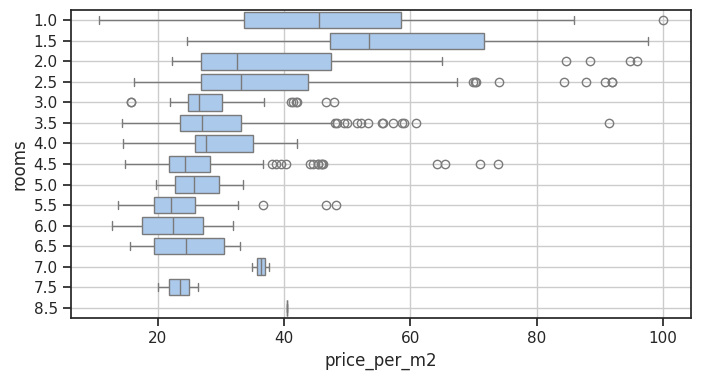

In [52]:
# Plot boxplot with groups
plt.figure(figsize=(8,4))
ax = sns.boxplot(x="price_per_m2",
                 y="rooms",
                 data=df,
                 orient='h')
plt.grid()
plt.show()

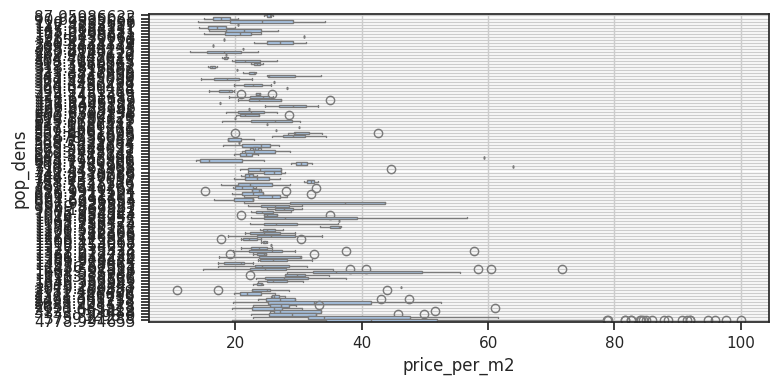

In [53]:
# Plot boxplot with groups
plt.figure(figsize=(8,4))
ax = sns.boxplot(x="price_per_m2",
                 y="pop_dens",
                 data=dfdens,
                 orient='h')
plt.grid()
plt.show()

## ANOVA to compare the price_per_m2 per number of rooms (= groups)

In [54]:
# Create subsets (groups)
r2_5 = df.loc[df['rooms'] == 2.5]['price_per_m2']
r3_5 = df.loc[df['rooms'] == 3.5]['price_per_m2']
r4_5 = df.loc[df['rooms'] == 4.5]['price_per_m2']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(r2_5, r3_5, r4_5)

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 34.26 p-value 0.0


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the price per m2 differ between apartments with 2.5, 3.5 and 4.5 rooms. Note that, from the ANOVA, it is not clear which groups show price differences. For this a post-hoc test could be used (not part of the exercises).</p>

## prices and pop density

In [55]:
# Create ANOVA
fvalueprice, pvalueprice = stats.f_oneway(low_pop_dens['price_per_m2'], moderate_pop_dens['price_per_m2'], high_pop_dens['price_per_m2'])

# Print results
print('F-value:', fvalueprice.round(3), 'p-value', pvalueprice.round(4))

F-value: 91.272 p-value 0.0


Null Hypothesis the mean pricer per m2 of rental aparmtents are equal across the three groups.
Alternative Hypothesis the mean prices per m2 of rental apartmens are not equal for at leas one of the tree groups.
The calculated F-Value 91.2 indicated that the variation between the group means is much larger than the variation within the groups. This suggests a strong difference in mean prices across the three groups. Because the p-value is lower than 0.05, the null hypothesis can be rejected. Since the null hypothesis is rejected, we conclude that the mean price per m2 of rental aparments differ significantly among the three groups categorized by population density. 

## areas and pop density

In [56]:
# Create ANOVA
fvaluearea, pvaluearea = stats.f_oneway(low_pop_dens['area'], moderate_pop_dens['area'], high_pop_dens['area'])

# Print results
print('F-value:', fvaluearea.round(3), 'p-value', pvaluearea.round(4))

F-value: 28.478 p-value 0.0


Null Hypothesis the mean areas of rental aparments are equal across the three groups of municipalities.
Alternative Hypothesis the mean areas of rental apartmens are not equal for at least one of the three groups.
The calculated F-Value 28.4 indicates that the variation in the mean aparment areas between the groups is substantially larger than the variation within the groups. Because the p-value is lower than 0.05, the null hypothesis can be rejected. Since the null hypothesis is rejected, we conclude that the mean areas of rental aparments differ significantly among municipalities with low, moderate and high population density.

## Number of rooms and pop density

In [57]:
# Create ANOVA
fvaluerooms, pvaluerooms = stats.f_oneway(low_pop_dens['rooms'], moderate_pop_dens['rooms'], high_pop_dens['rooms'])

# Print results
print('F-value:', fvaluerooms.round(3), 'p-value', pvaluerooms.round(4))

F-value: 41.043 p-value 0.0


Null hypothese the mean number of rooms in rental apartmens is equal across the three groups of municipalities.
Alternative the hypothesis the mean number of rooms in rental apartmens in not equal for at leas one of the three groups.
Significance level a = 0.05.
The calculated F-Value of 41.04 indicates that the variation in the mean number of rooms between the groups is significantly larger than the variation within the groups. Because the p-valu eis lower than 0.05, the null hypothesis can be rejected. Since the null hypothesis is rejected, we conclude that the mean number of rooms in rental apartmens differs significantly among the groups.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [58]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-12-03 11:06:04
Python Version: 3.11.10
-----------------------------------
